In [1]:
#import dependencies 
import pandas as pd
import requests 
import random
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from citipy import citipy

#import 
from config import api_key

#create output data file
output_data_file = "output_data/cities.csv"

In [3]:
# List for holding lat_lngs and cities
lat_long = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lat, long)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

In [5]:
# Create base URL for open weather map API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        print(f'Processing Record {record} | {city}')
        record += 1
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found.')
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 | munkebo
Processing Record 2 | provideniya
Processing Record 3 | king city
Processing Record 4 | hilo
Processing Record 5 | punta arenas
Processing Record 6 | mataura
Processing Record 7 | nikolskoye
Processing Record 8 | sioux lookout
Processing Record 9 | capao bonito
Processing Record 10 | cabanas
Processing Record 11 | kapaa
Processing Record 12 | beringovskiy
Processing Record 13 | carnarvon
City not found.
Processing Record 14 | ushuaia
Processing Record 15 | isangel
Processing Record 16 | saint-augustin
Processing Record 17 | avarua
Processing Record 18 | kaoma
Processing Record 19 | willmar
Processing Record 20 | hobart
Processing Record 21 | mayumba
Processing Record 22 | chuy
Processing Record 23 | khatanga
Processing Record 24 | jamestown
Processing Record 25 | port elizabeth
City not found.
Processing Record 26 | thompson
Processing Record 27 | sfantu gheorghe
Processing Record 28 | naze
Processing Reco

Processing Record 234 | ballarpur
Processing Record 235 | okhotsk
Processing Record 236 | padmanabhapuram
Processing Record 237 | comodoro rivadavia
City not found.
Processing Record 238 | nioro
Processing Record 239 | yinchuan
Processing Record 240 | knyaze-volkonskoye
Processing Record 241 | gaogou
Processing Record 242 | asasa
Processing Record 243 | sungairaya
Processing Record 244 | mporokoso
Processing Record 245 | puerto leguizamo
City not found.
Processing Record 246 | richards bay
Processing Record 247 | arroio grande
Processing Record 248 | miandrivazo
Processing Record 249 | beboto
Processing Record 250 | tiksi
City not found.
Processing Record 251 | sitio novo do tocantins
Processing Record 252 | nuuk
Processing Record 253 | kerrville
Processing Record 254 | luderitz
Processing Record 255 | inirida
Processing Record 256 | tilichiki
Processing Record 257 | saldanha
Processing Record 258 | manyana
Processing Record 259 | vanavara
Processing Record 260 | coahuayana
City not fo

Processing Record 471 | oranjestad
Processing Record 472 | baton rouge
Processing Record 473 | primorsko-akhtarsk
Processing Record 474 | benguela
Processing Record 475 | poum
Processing Record 476 | sitka
Processing Record 477 | tenenkou
Processing Record 478 | sinnamary
Processing Record 479 | valparaiso
Processing Record 480 | melfort
Processing Record 481 | jining
Processing Record 482 | sebezh
Processing Record 483 | severo-kurilsk
Processing Record 484 | agadez
Processing Record 485 | saint-francois
Processing Record 486 | kamaishi
City not found.
Processing Record 487 | sambava
Processing Record 488 | atar
City not found.
Processing Record 489 | kitgum
Processing Record 490 | ahipara
Processing Record 491 | dwarka
Processing Record 492 | naguabo
Processing Record 493 | okahandja
Processing Record 494 | keuruu
Processing Record 495 | shubarshi
City not found.
Processing Record 496 | madang
Processing Record 497 | bandiagara
Processing Record 498 | fene
Processing Record 499 | har

In [9]:
# Create values dictionary from API call lists.
weatherdata = {
    'City': name_city,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
weather_df = pd.DataFrame(weatherdata)
#output to csv
weather_df.to_csv('weatherdata.csv')

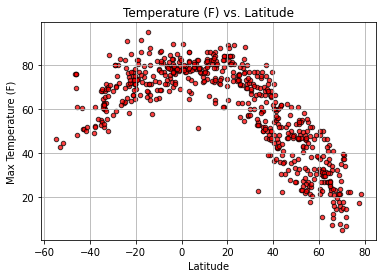

In [24]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(df_weather['Lat'], df_weather['Max Temperature'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('Temperature (F) vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Max_Temp_vs_Lat.png')
plt.show()

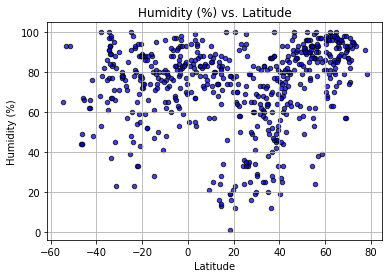

In [25]:
# Create scatter plot for Lat vs Humidity.
plt.scatter(df_weather['Lat'], df_weather['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Humidity (%) vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Humidity_vs_Lat.png')

plt.show()

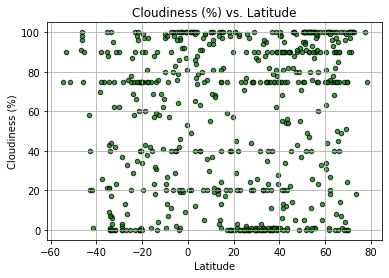

In [26]:
# Create scatter plot for Lat vs Cloudiness.
plt.scatter(df_weather['Lat'], df_weather['Cloudiness'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Cloudiness_vs_Lat.png')
plt.show()

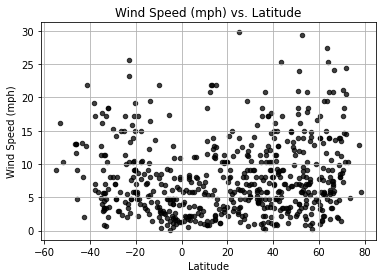

In [27]:
# Create scatter plot for Lat vs Wind Speed.
plt.scatter(df_weather['Lat'], df_weather['Wind Speed'], marker='o', s=20, c='black', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Windspeed_vs_Lat.png')
plt.show()